In [1]:
reset -fs

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skopt import gp_minimize
from scipy.stats import gamma
import pymc3 as pm
%matplotlib inline

In [3]:
noise_level = .1 #.1 = Low noise, .4 = high-ish noise

# def f(x, noise_level=noise_level):
#     "Simple is as simple does"
#     return (x[0]-1)**2 + (np.random.randn() * noise_level)

# def f(x, noise_level=noise_level):
#     "I'm a inverse hat 👒"
#     return -np.sin(10 * x[0])/(10 * x[0]) + (np.random.randn() * noise_level)

def f(x, noise_level=noise_level):
    "Bumps in the road"
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + (np.random.randn() * noise_level)

In [4]:
# Plot f(x) + contours
bounds = (-2.0, 2.0)
x = np.linspace(bounds[0], bounds[1], 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]


In [5]:
results = gp_minimize(f,              # the function to minimize
                  [bounds],           # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function, Expected Improvement
                  n_calls=25,         # the number of evaluations of f 
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=123)   # the random seed

In [6]:
from skopt.acquisition import gaussian_ei

x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = results.space.transform(x.tolist())
fx = np.array([f(x_i, noise_level=0.0) for x_i in x])



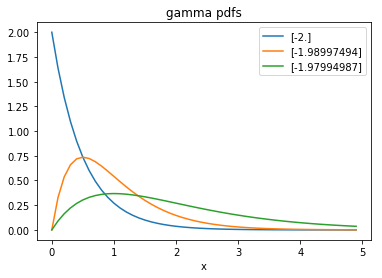

In [11]:

xpos=np.arange(0,5,0.1)
def gammafunc(x,alpha, beta):
    return gamma.pdf(x,alpha, scale=1./beta)
plt.plot(xpos,gammafunc(xpos, 1.,2.))
plt.plot(xpos,gammafunc(xpos, 2.,2.))
plt.plot(xpos,gammafunc(xpos, 2.,1.))

plt.xlabel("x")
plt.title("gamma pdfs");
plt.legend(x)

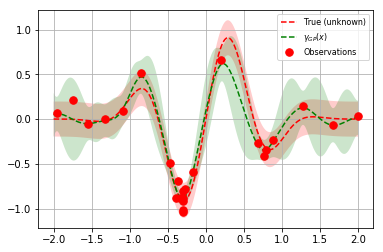

In [7]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = results.space.transform(x.tolist())

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

# Plot GP(x) + contours
gp = results.models[-1]
y_pred, sigma = gp.predict(x_gp, return_std=True)

plt.plot(x, y_pred, "g--", label=r"$\gamma_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(results.x_iters, 
         results.func_vals, 
         "r.", markersize=15, label="Observations")


plt.legend(loc="best", prop={'size': 8}, numpoints=1)
plt.grid()

plt.show()

<br>
<br> 
<br>

----